# Classification of chronic kidney diseance

In [2]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *
from visualisation import *

In [3]:
data = pd.read_csv('./data/kidney_disease.csv')
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data preparation 

In [5]:
path = './data/preprocessed.csv'
target_name = 'Class'
test_size= 0.3

In [6]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, target_name, test_size)

X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)


In [7]:
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

# Data visualisation

---- Plotting the scatter plot matrix... ----


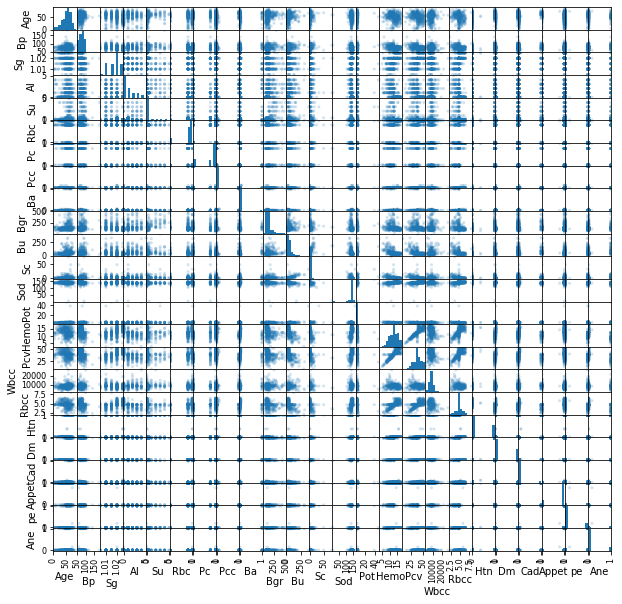


------------------------------

---- Plotting the parallel coordinates... ----


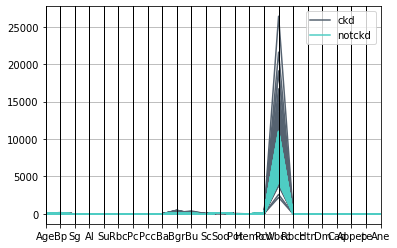


------------------------------

---- Plotting the kernel density estimation... ----

 ----- Plots finished! -----


In [18]:
all_visualisation(path,target_name)

# Random Forest

First we test the model with default parameter

In [8]:
data_train = X_train, y_train
model = m.RandomForest( train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\faull\OneDrive\Documents\Scolaire\IMT\MCE\Machine learning\Git\models.py:124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Then we use Grid Search CV to optimize the parameters and we compare the results we get

In [9]:

param_grid = {'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}
  
    

gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    7.7s finished
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [10]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)

les meilleurs paramètres sont  {'class_weight': {0: 0.33, 1: 0.67}, 'max_depth': 3, 'n_estimators': 11, 'random_state': 42}
les meilleur score est  1.0
Confusion Matrix: 
 [[80  1]
 [ 0 39]]
Accuracy :  99.16666666666667
Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



No handles with labels found to put in legend.


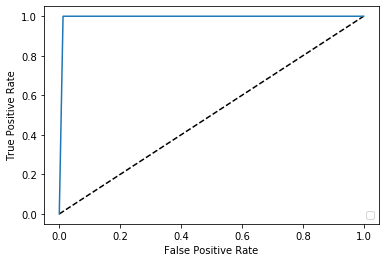

In [12]:
plot_roc(y_test,y_pred)

# SVM

C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
No handles with labels found to put in legend.


Confusion Matrix: 
 [[81  0]
 [39  0]]
Accuracy :  67.5
Report : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        81
           1       0.00      0.00      0.00        39

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.40       120
weighted avg       0.46      0.68      0.54       120



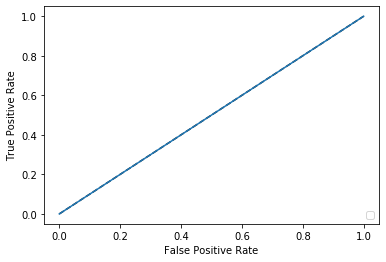

In [15]:
data_train = X_train, y_train
model = m.SVM( train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)
plot_roc(y_test,y_pred>0.5)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.6s finished
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


les meilleurs paramètres sont  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
les meilleur score est  0.8107142857142857
Confusion Matrix: 
 [[73  8]
 [10 29]]
Accuracy :  85.0
Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        81
           1       0.78      0.74      0.76        39

    accuracy                           0.85       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120



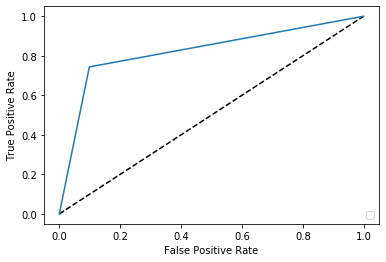

In [16]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000],  
              'gamma': [1, 0.1, 0.01,0.05, 0.001, 0.0001],
              #'degree' : [1,3],
              'kernel': ['rbf']}  
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)
plot_roc(y_test,y_pred>0.5)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.5min finished
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


les meilleurs paramètres sont  {'C': 0.1, 'kernel': 'linear'}
les meilleur score est  0.975
Confusion Matrix: 
 [[79  2]
 [ 1 38]]
Accuracy :  97.5
Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.97      0.98       120



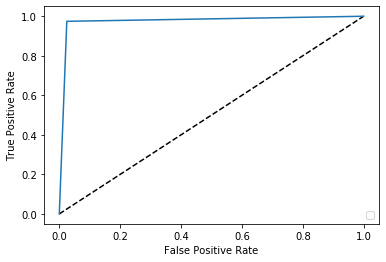

In [17]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000],  
              #'gamma': [1, 0.1, 0.01,0.05, 0.001, 0.0001],
              #'degree' : [1,3],
              'kernel': ['linear']}  
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)
plot_roc(y_test,y_pred)

## Decision tree classification 

Let's first train a decision tree classifier with default parameters and evaluate it's preformance.

In [47]:
data_train = X_train, y_train
Decision_clf = m.DecisionTreeModel( train = True, X_train= X_train, y_train = y_train)

## Prediction and accuracy 

In [7]:
y_pred = m.predict(Decision_clf, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[79  2]
 [ 2 37]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.95      0.95      0.95        39

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



## Cross validation

In [8]:
results = cross_validation(Decision_clf, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.97


## Parameters tunig 

In [9]:
model = m.DecisionTreeModel( train = False)

In [10]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(1,10),
              'min_samples_leaf': range(1,10) } 

In [11]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)

les meilleurs paramètres sont  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
les meilleur score est  0.9857142857142858
Confusion Matrix: 
 [[79  2]
 [ 2 37]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.95      0.95      0.95        39

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



# Neural Networks 

## Improved Multilayer perceptron

In [13]:
MLP = m.build_MLP((24,))
history = m.train_nn(MLP,X_train, y_train, X_test, y_test, epochs = 20)

Train on 280 samples, validate on 120 samples
Epoch 1/20
280/280 [==============================] - 1s 2ms/step - loss: 0.6110 - accuracy: 0.6857 - val_loss: 0.3883 - val_accuracy: 0.8000
Epoch 2/20
280/280 [==============================] - 0s 58us/step - loss: 0.2359 - accuracy: 0.9000 - val_loss: 0.1591 - val_accuracy: 0.9417
Epoch 3/20
280/280 [==============================] - 0s 67us/step - loss: 0.1252 - accuracy: 0.9464 - val_loss: 0.1289 - val_accuracy: 0.9583
Epoch 4/20
280/280 [==============================] - 0s 71us/step - loss: 0.0913 - accuracy: 0.9786 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 5/20
280/280 [==============================] - 0s 69us/step - loss: 0.0705 - accuracy: 0.9821 - val_loss: 0.0525 - val_accuracy: 0.9917
Epoch 6/20
280/280 [==============================] - 0s 67us/step - loss: 0.0549 - accuracy: 0.9857 - val_loss: 0.0475 - val_accuracy: 0.9917
Epoch 7/20
280/280 [==============================] - 0s 72us/step - loss: 0.0452 - accuracy: 0.9

In [14]:
y_pred = m.predict(MLP, X_test)
accuracy(y_test, (y_pred>0.5).astype(float))

Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [18]:
cross_validation(lambda : m.build_MLP((24,)), X,y,epochs=20, batch_size=70, n_splits=3, is_keras_model= True)

avg accuracy : 0.9949874877929688


array([1.        , 0.99248123, 0.99248123])

In [25]:
param_grid = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

In [26]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train,lambda : m.build_MLP((24,)), 
                                         param_grid ,scoring_fit = 'accuracy', is_keras_model = True 
                                        )

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.3min finished


In [27]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred)

les meilleurs paramètres sont  {'batch_size': 40, 'epochs': 200}
les meilleur score est  0.9964285714285714
Confusion Matrix: 
 [[78  3]
 [ 0 39]]
Accuracy :  97.5
Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.93      1.00      0.96        39

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [35]:
cross_validation(lambda : m.build_MLP((24,)), X,y, n_splits=3, is_keras_model= True, **best_parameters)

avg accuracy : 0.9649497071901957


array([0.98507464, 0.97744364, 0.93233085])

## CNN architecture

In [36]:
CNN = m.build_CNN(input_shape = (24,1))


### Script for automation

In [9]:
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 

In [16]:
path = 
target_name =
test_size =
train =
epochs = 
batch_size = 


In [14]:
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 

models = {'MLP': {'build_fn':m.build_MLP((24,)),'params': param_grid_MLP},
          'Decision_tree' : { 'build_fn':m.DecisionTreeModel( train = False),'params': param_grid_Dt}         
         }
model_name = 'MLP'
finetune = True

model

In [15]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, target_name, test_size)
y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])



X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)


In [21]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *
from sklearn.preprocessing import label_binarize
import argparse

parser = argparse.ArgumentParser('Parameter tuning for classification on a defined dataset')
parser.add_argument('--path', type=str, default='none')
parser.add_argument('--target_name', type=str, default='Class')
parser.add_argument('--test_size', type=float, default=0.3)
parser.add_argument('--train', type=bool, default='true')
parser.add_argument('--batch_size', type=int, default=70)
parser.add_argument('--epochs', type=int, default=15)
parser.add_argument('--model_name', type=str, default='MLP')
parser.add_argument('--finetune', type=bool, default='false')


args = parser.parse_args()

path = args.path
target_name = args.target_name
test_size =args.test_size
train = args.train
epochs = args.epochs
batch_size = args.batch_size
model_name = args.model_name
finetune = model.finetune

df, X, y, X_train, X_test, y_train, y_test = load_data(path, target_name, test_size)
y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

models = {'MLP': {'build_fn':lambda : m.build_MLP((24,)),'params': param_grid_MLP},
          'Decision_tree' : { 'build_fn':m.DecisionTreeModel( train = False),'params': param_grid_Dt}         
         }
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 


if finetune :
    
    model = models[model_name]['build_fn']
    param_grid = models[model_name]['params']
    gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train,  model, param_grid ,scoring_fit = 'accuracy', is_keras_model = True )
    best_parameters = get_best_parameters(gs )
    y_pred = m.predict(fitted_model, X_test)
    accuracy(y_test, y_pred>0.5)
    results = cross_validation( model, X,y, n_splits=10, is_keras_model = True,  **best_parameters)

             
             



X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.0min finished


les meilleurs paramètres sont  {'batch_size': 40, 'epochs': 10}
les meilleur score est  0.9892857142857143
Confusion Matrix: 
 [[81  0]
 [ 1 38]]
Accuracy :  99.16666666666667
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

avg accuracy : 0.9925000011920929


In [39]:
!python3 classify.py --path './data/preprocessed.csv' --model_name 'MLP' --finetune True

Using TensorFlow backend.
X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)
2019-11-30 02:54:51.394269: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-30 02:54:51.407754: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faf0ba03430 executing computations on platform Host. Devices:
2019-11-30 02:54:51.407784: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
[CV] batch_size=70, epochs=5 .........................................
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors dur

In [29]:
results

array([1.        , 0.97500002, 1.        , 1.        , 1.        ,
       0.94999999, 1.        , 1.        , 1.        , 1.        ])